In [1]:
import overpy
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

In [2]:
overpass_api = overpy.Overpass()

# Extracting Tartu city information
bbox_str =  ', '.join(['%.10f' % x for x in [58.3691, 26.6906, 58.3892, 26.7549]])
result = overpass_api.query(
'''
    (
      way["highway"](%s);
    );
    (._;>;);
    out;
''' % (bbox_str))

## Showing Tartu with clients

In [3]:
node_cols = ['id','lon','lat']
df_nodes = pd.DataFrame([[getattr(node,a) for a in node_cols] for node in result.nodes])\
    .rename(columns=dict(zip(range(len(node_cols)),node_cols)))

df_nodes = df_nodes.set_index(df_nodes.id)
del df_nodes['id']

df_ways = pd.DataFrame(np.concatenate([np.asarray([(w.id,n.id) for n in w.nodes]) for w in result.ways]))\
    .rename(columns={0:'way', 1:'node'})

df_ways = df_ways.set_index(df_ways.way)
del df_ways['way']
 
clients = [{"from": (26.712434, 58.374371),"to": (26.722610, 58.378017), "color": "red"},
           {"from": (26.726407, 58.385839),"to": (26.722610, 58.378017), "color": "blue"},
           {"from": (26.732135, 58.382367),"to": (26.722610, 58.378017), "color": "purple"}]

taxi = {"location": (26.731664, 58.376783), "color": "yellow"}

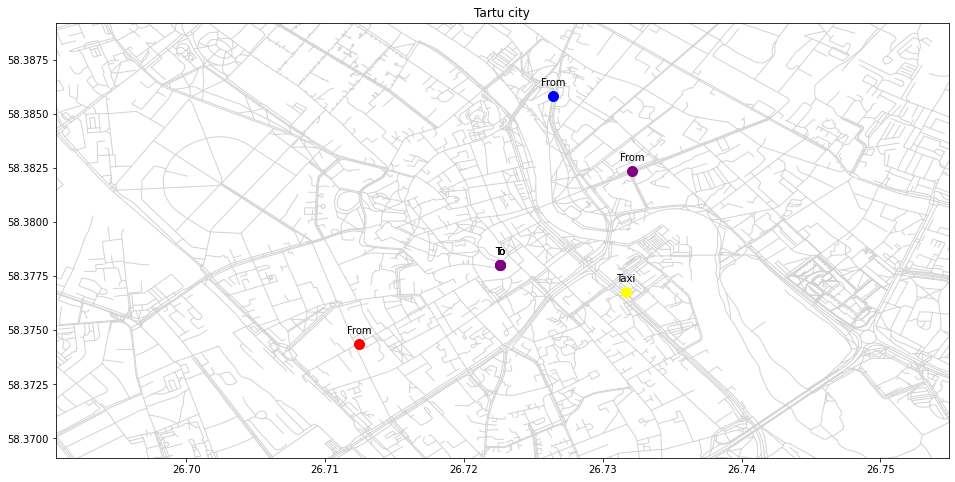

In [4]:
def drawMap(clients, taxi):
    plt.figure(figsize=(16,8))
    # Drawing all roads
    for way in result.ways:
        way_nodes = df_ways.node[way.id]
        way_coords = df_nodes.loc[way_nodes].values
        plt.plot(*way_coords.T, color='lightgray', linewidth=1)

    # Show clients
    for client in clients:
        # Show client start point
        plt.plot(client['from'][0], client['from'][1], 'o', color=client['color'], markersize=10)
        plt.annotate('From',(client['from'][0], client['from'][1]),textcoords="offset points", xytext=(0,10), ha='center')

        # Show client end point
        plt.plot(client['to'][0], client['to'][1], 'o', color=client['color'], markersize=10)
        plt.annotate('To',(client['to'][0], client['to'][1]),textcoords="offset points", xytext=(0,10), ha='center')

    # Show taxi location
    plt.plot(taxi['location'][0], taxi['location'][1], 'o', color=taxi['color'], markersize=10)
    plt.annotate('Taxi',(taxi['location'][0], taxi['location'][1]),textcoords="offset points", xytext=(0,10), ha='center')

    plt.xlim(26.6906, 26.7549)
    plt.ylim(58.3691, 58.3892)
    plt.title("Tartu city")
    plt.show()
    
drawMap(clients, taxi)